# TEAM MEMBER NAMES

ARITRA MAJUMDER (MCS202304)

NANDINI JAISWAL(MDS202335)

# **Import the necessary libraries**

In [ ]:
# Importing all the libraries

import time
from tqdm import tqdm
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from collections import defaultdict

# **A function to load and preprocess datasets**

In [ ]:
# Function to load and preprocess datasets

def load_preprocess_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        lines = file.readlines()
        documents = [line.strip() for line in lines]
    return documents

In [ ]:
# Load and preprocess datasets

enron_docs = load_preprocess_dataset('docword.enron.txt')
nips_docs = load_preprocess_dataset('docword.nips.txt')
kos_docs = load_preprocess_dataset('docword.kos.txt')

datasets = [enron_docs, nips_docs, kos_docs]

# **Calculate Jaccard Distance**

In [ ]:
# Function to calculate Jaccard distance

def jaccard_distance(doc1, doc2):
  return 1-np.double(np.bitwise_and(doc1, doc2).sum()) / np.double(np.bitwise_or(doc1, doc2).sum())

# **K-Means Clustering using Jaccard Distance**

In [ ]:
# Jaccard K-Means class

class JaccardKMeans(KMeans):
  def __init__(self, n_clusters, **kwargs):
    super().__init__(n_clusters, **kwargs)

  def _distance_formula(self, X, Y, squared=False):
    return np.apply_along_axis(jaccard_distance, 1, X, Y)

class JaccardMiniBatchKMeans(MiniBatchKMeans):
  def __init__(self, n_clusters, **kwargs):
    super().__init__(n_clusters, **kwargs)

  def _distance_formula(self, X, Y, squared=False):
    return np.apply_along_axis(jaccard_distance, 1, X, Y)

# **Function that performs the following task for each of the datasets----**
(**only for NIPS full papers and KOS blog entries datasets**)


*   Find the Elbow point
*   Plot Goodnesss Of Clustering (a plot of average Jaccard distance vs value of k)
*   Plot Inertia Of Clustering (a plot of Inertia vs value of k)
*   Plot Silhouette Score Of Clustering (a plot of Silhouette score vs value of k)









In [ ]:
def process_dataset_plot_clusters_and_get_elbow(selector):

    # Processing the document vector matrix

    D = int(selector[0])
    W = int(selector[1])
    NNZ = int(selector[2])

    documents_words_matrix = [[0] * W for _ in range(D)]

    for i in range(3, NNZ):
        line = selector[i]
        ids = [int(element.strip()) for element in line.split()]
        doc_id = ids[0]
        word_id = ids[1]
        documents_words_matrix[doc_id-1][word_id-1] = 1

    documents_words_matrix = np.array(documents_words_matrix)

    # preprocess pairwise distances

    jaccard_distance_matrix = [[0] * D for _ in range(D)]

    for i in tqdm(range(D)):
        for j in range(i+1, D):
            jaccard_distance_matrix[i][j] = jaccard_distance(documents_words_matrix[i], documents_words_matrix[j])

    jaccard_distance_matrix = np.array(jaccard_distance_matrix)

    max_number_of_clusters = 50

    inertia = [0] * max_number_of_clusters
    silhouette_score_ = [0] * max_number_of_clusters
    goodness_of_clustering = [0] * max_number_of_clusters

    #  Train the K-Means model and get labels

    for k in tqdm(range(1,max_number_of_clusters+1)):
        jaccard_k_means = JaccardKMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = jaccard_k_means.fit(documents_words_matrix)
        labels = clusters.labels_

        # Get jaccard distance of each cluster and calculate mean

        def get_average_jaccard_distance_of_clusters():
            total_jaccard_distance_of_clusters = 0
            total_count = 0
            for i in range(D):
                for j in range(i+1, D):
                    if labels[i] == labels[j]:
                        total_jaccard_distance_of_clusters += jaccard_distance_matrix[i][j]
                        total_count += 1
            return total_jaccard_distance_of_clusters/total_count

        inertia[k-1] = clusters.inertia_

        try:
            silhouette_score_[k-1] = silhouette_score(documents_words_matrix, labels)
        except Exception as e:
            silhouette_score_[k-1] = 0

        goodness_of_this_clustering = get_average_jaccard_distance_of_clusters()
        goodness_of_clustering[k-1] = goodness_of_this_clustering

    # plot goodness of clustering
    plt.plot(np.arange(1,max_number_of_clusters + 1), goodness_of_clustering)
    plt.title("Goodness of clustering")
    plt.xlabel("Value of k")
    plt.ylabel("Average jaccard distance of clustering")

    plt.show()
    print("\n")

    # plot inertia

    plt.plot(np.arange(1,max_number_of_clusters + 1), inertia)
    plt.title("Inertia")
    plt.xlabel("Value of k")
    plt.ylabel("Inertia of clustering")

    plt.show()
    print("\n")

    # plot silhouette score

    plt.plot(np.arange(1,max_number_of_clusters + 1), silhouette_score_)
    plt.title("Silhouette Score")
    plt.xlabel("Value of k")
    plt.ylabel("Silhouette Score of clustering")

    plt.show()
    print("\n")

    elbow = np.where(silhouette_score_ == np.max(silhouette_score_))[0][0] + 1

    print("Elbow is " + str(elbow))

# **Result for KOS blog entries**

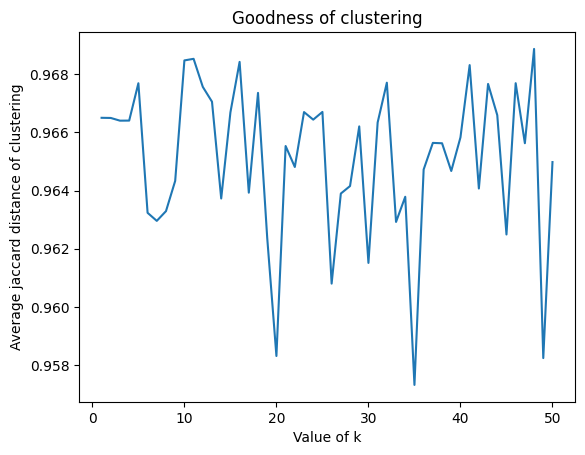

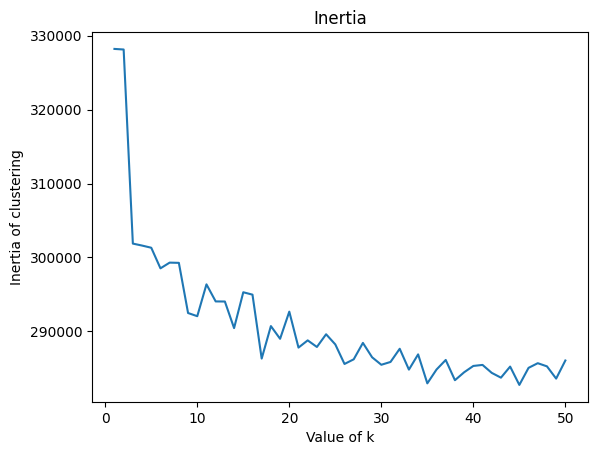

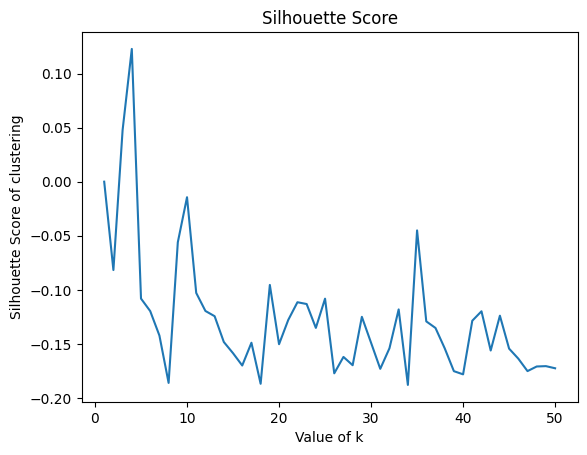



Elbow is 4
Model fit time: 1207.48 seconds


In [ ]:
# Result for docword.kos.txt

start_time = time.time()

process_dataset_plot_clusters_and_get_elbow(datasets[2])

end_time = time.time()

print(f"Model fit time: {end_time - start_time:.2f} seconds")

# **Result for NIPS full papers**

100%|██████████| 50/50 [12:43<00:00, 15.27s/it]


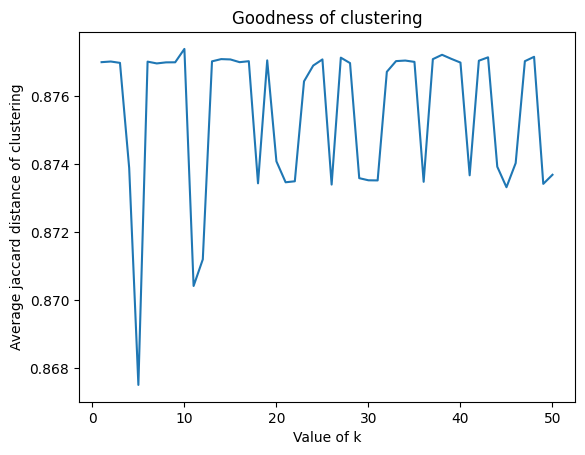

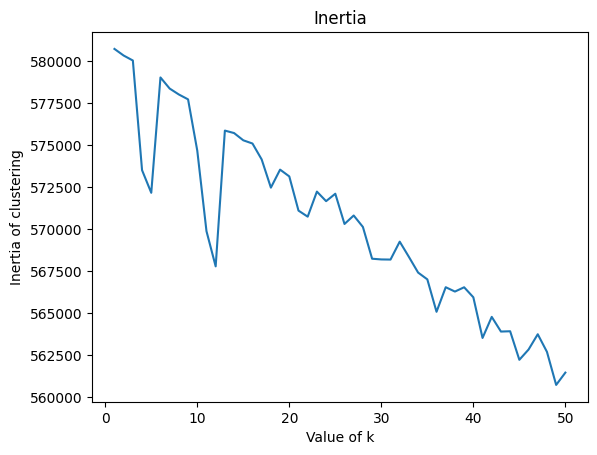

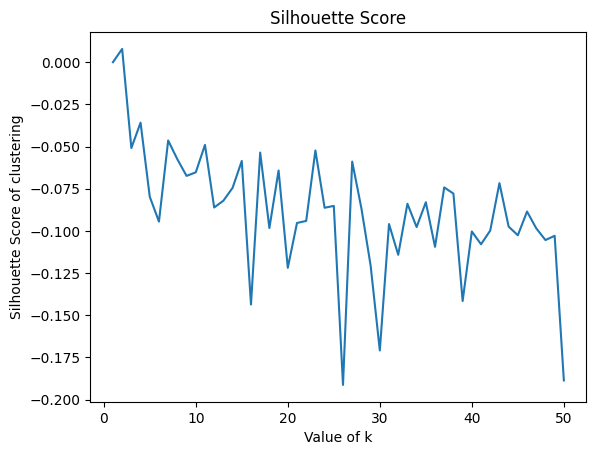



Elbow is 2
Model fit time: 805.85 seconds


In [ ]:
# Result for docword.nips.txt

start_time = time.time()

process_dataset_plot_clusters_and_get_elbow(datasets[1])

end_time = time.time()

print(f"Model fit time: {end_time - start_time:.2f} seconds")

# **The following function performs the same task of finding the elbow point and plotting the three curves for Enron Emails dataset**
Since Enron Emails is a very large dataset, we perform all the tasks on a sample representative data(selected randomly) of 2500 size.

In [ ]:
def process_dataset_plot_clusters_and_get_elbow_for_large_dataset(selector):

    # Processing the document vector matrix

    D = int(selector[0])
    W = int(selector[1])
    NNZ = int(selector[2])

    S_D = 2500 # sample size of id
    sample_doc_id = np.random.randint(D, size=S_D)
    dict_docs = defaultdict(lambda: -1)

    for i in range(S_D):
        dict_docs[sample_doc_id[i]] = i

    seen_words_id = []
    dict_words = defaultdict(lambda: -1)

    for i in tqdm(range(3, NNZ)):
        line = selector[i]
        ids = [int(element.strip()) for element in line.split()]
        doc_id = ids[0]
        if dict_docs[doc_id] != -1:
            seen_words_id.append(ids[1])

    seen_words_id = list(set(seen_words_id))
    S_W = len(seen_words_id)
    for i in range(S_W):
        dict_words[seen_words_id[i]] = i

    documents_words_matrix = [[0] * S_W for _ in range(S_D)]

    for i in tqdm(range(3, NNZ)):
        line = selector[i]
        ids = [int(element.strip()) for element in line.split()]
        doc_id = ids[0]
        word_id = ids[1]
        if dict_words[word_id] != -1 and dict_words[doc_id] != -1:
            try:
                documents_words_matrix[dict_words[doc_id]][dict_words[word_id]] = 1
            except Exception as e:
                pass

    documents_words_matrix = np.array(documents_words_matrix)
    # preprocess pairwise distances for sampled points

    jaccard_distance_matrix = [[0] * S_D for _ in range(S_D)]

    for i in tqdm(range(S_D)):
        for j in range(i+1, S_D):
            jaccard_distance_matrix[i][j] = jaccard_distance(documents_words_matrix[i], documents_words_matrix[j])

    jaccard_distance_matrix = np.array(jaccard_distance_matrix)

    max_number_of_clusters = 50

    silhouette_score_ = [0] * max_number_of_clusters
    goodness_of_clustering = [0] * max_number_of_clusters

    #  Train the K-Means model and get labels

    for k in tqdm(range(1, max_number_of_clusters + 1)):
        jaccard_k_means = JaccardMiniBatchKMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = jaccard_k_means.fit(documents_words_matrix)
        labels = clusters.labels_

        # Get jaccard distance of each cluster and calculate mean

        def get_average_jaccard_distance_of_clusters():
            total_jaccard_distance_of_clusters = 0
            total_count = 0
            for i in range(S_D):
                for j in range(i+1, S_D):
                    if labels[i] == labels[j]:
                        total_jaccard_distance_of_clusters += jaccard_distance_matrix[i][j]
                        total_count += 1
            return total_jaccard_distance_of_clusters/total_count

        try:
            silhouette_score_[k-1] = silhouette_score(documents_words_matrix, labels)
        except Exception as e:
            silhouette_score_[k-1] = 0

        goodness_of_this_clustering = get_average_jaccard_distance_of_clusters()
        goodness_of_clustering[k-1] = goodness_of_this_clustering

    # plot goodness of clustering
    plt.plot(np.arange(1,max_number_of_clusters + 1), goodness_of_clustering)
    plt.title("Goodness of clustering")
    plt.xlabel("Value of k")
    plt.ylabel("Average jaccard distance of clustering")

    plt.show()
    print("\n")

    # plot silhouette score

    plt.plot(np.arange(1,max_number_of_clusters + 1), silhouette_score_)
    plt.title("Silhouette Score")
    plt.xlabel("Value of k")
    plt.ylabel("Silhouette Score of clustering")

    plt.show()
    print("\n")

    elbow = np.where(silhouette_score_ == np.max(silhouette_score_))[0][0] + 1

    print("Elbow is " + str(elbow))



# **Result for Enron Emails**

100%|██████████| 50/50 [33:40<00:00, 40.41s/it]


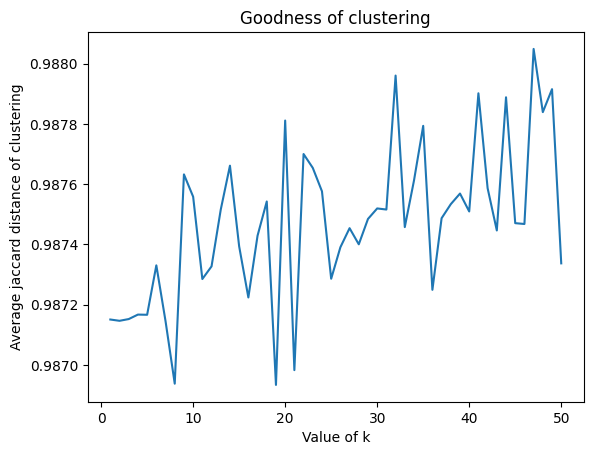

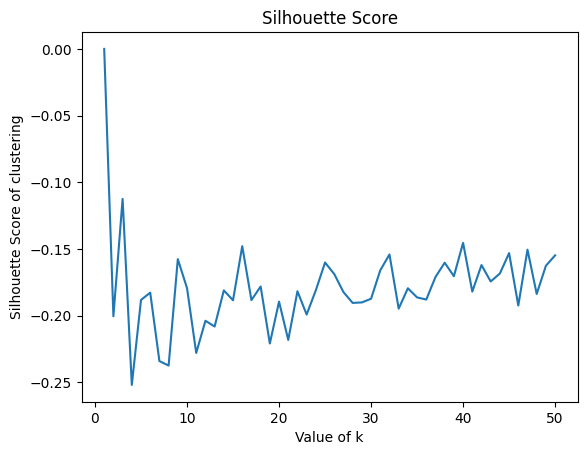



Elbow is 1
Model fit time: 2196.09 seconds


In [ ]:
# Result for docword.enron.txt

start_time = time.time()

process_dataset_plot_clusters_and_get_elbow_for_large_dataset(datasets[0])

end_time = time.time()

print(f"Model fit time: {end_time - start_time:.2f} seconds")

# REPORT

At first we load and pre-process the datasets.

Next, we have defined a function called jaccard_distance which calculates the Jaccard distance between two binary vectors representing documents.We have computed the Jaccard distance using the formula 1 - (intersection / union), where intersection is the number of common elements between doc1 and doc2, and union is the total number of unique elements in both doc1 and doc2. The Jaccard distance measures dissimilarity, so subtracting this value from 1 gives the Jaccard similarity. Therefore, 1 - Jaccard similarity gives the Jaccard distance.

Next we have defined a Jaccard KMeans class which extends the functionality of the KMeans clustering algorithm to use the Jaccard distance metric instead of the Euclidean distance.  

The process_dataset_plot_clusters_and_get_elbow function performs KMeans on the datasets and finds the elbow point for clustering each of the datasets.

Here, we have also obtained the goodness of clustering plot by plotting average Jaccard distance against k-values, the plot of inertia versus k-values and the plot of Silhouette score of clustering versus k-values.

The function process_dataset_plot_clusters_and_get_elbow_for_large_dataset is slightly different from the process_dataset_plot_clusters_and_get_elbow function as here we have used a sample of docs from Enron emails dataset for clustering(including all the words for the sampled docs) as the original dataset is very large.Rest is same as what has been done in the process_dataset_plot_clusters_and_get_elbow function.

For NIPS full papers dataset and for KOS blog entries, we have used the function process_dataset_plot_clusters_and_get_elbow i.e., we have performed KMeans clustering on the complete dataset rather than on a sample as the two datasets are not very large.

The elbow point for each dataset and the model fit point for each dataset is given as follows--

RESULT FOR KOS blog entries
Elbow is 4
Model fit time is 1207.48 seconds.

RESULT FOR NIPS full papers
Elbow is 2
Model fit time is 805.85 seconds.

RESULT FOR Enron emails
Elbow is 1
Model fit time is 2196.09 seconds.